<a href="https://colab.research.google.com/github/mamonalsalihy/Emotion_Detection/blob/main/Models/SVM_github_copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [49]:
import  numpy as np
import  os
import  pandas as pd
from    sklearn.feature_extraction.text import TfidfVectorizer
from    sklearn.metrics import precision_recall_fscore_support, accuracy_score, confusion_matrix, classification_report
from    sklearn.model_selection import train_test_split 
from    sklearn.preprocessing import LabelEncoder
from    sklearn.svm import LinearSVC
import  seaborn as sns
import  matplotlib.pyplot as plt
from    tqdm.auto import tqdm
from    sklearn.pipeline import Pipeline


#Setup paths

In [60]:
train_path = './train.csv'
valid_path = './valid.csv'
test_path = './test.csv'

# read in data
train = pd.read_csv(train_path)
valid = pd.read_csv(valid_path)
test  = pd.read_csv(test_path)

#SVM classifier

In [67]:
class SVM_Classifier:

  """
  class def for SVM classifier.
  """
  
  def __init__(self, X_train, y_train, liwc=False):
  
    """
    method for training and evalutating SVM classifier. input data
    is expected to be textutal, and will be vectorizered using
    tf-idf.
      paramtrs:
        X_train: type: iterable(str)
          the input data to train svm on, each text sample is 
          expected to be in raw str form. 
        y_train: type: iterable(str or int)
          the output/labels the svm to traget during
          training.
      return: none
    """

    # svm and tf-idf instances
    _svm = LinearSVC()
    _tfidf_vec = TfidfVectorizer(sublinear_tf=True,
                                 norm='l1',
                                 encoding='utf-8',
                                 stop_words=None)

    # defined pipeline
    if liwc: self.svm = _svm
    else:    self.svm = Pipeline([('tfidf', _tfidf_vec), 
                                  ('svm', _svm)])
  
    # fit on provided trainining data
    self.svm.fit(X_train, y_train)

  def evaluate_svm(self, X_test, y_test, accuracy=True, 
                   confusion=True):
  
    """
    evaluate the SVM on test data. produces precision, recall,
    f1, accuracy scores per sklearn's accuracy_report. also
    produces a confusion matrix.
      paramtrs:
        X_test: type: iterable(str)
          test data where samples are in form of a raw string.
        y_test: type: iterable(str or int)
          the targets of the data.
        accuracy: type: bool
          specify whether to produce the accuracy report.
        confusion: type: bool
          specify whether to produce the confusion matrix
          on the provided test set.
      return: none
    """

    # predict on provided test data
    y_test_pred = self.svm.predict(X_test)

    # report performance on test data
    if accuracy:
      report = classification_report(y_test, y_test_pred)
      print(report)

    # produce confusion matrix on test
    if confusion:
      # get unique taget labels
      unique_labels = list(set(y_test.tolist()))

      # get confusion matrix
      conf_mat =\
        confusion_matrix(y_test, y_test_pred, labels=unique_labels)
         
      # intialize heatmap with seaborn, specify axis, plot names
      fig, _ = plt.subplots(figsize=(10,10))
      sns.heatmap(conf_mat, annot=True, fmt='d',
                  xticklabels=unique_labels, yticklabels=unique_labels)
      plt.title('SVM Confusion on Test')
      plt.ylabel('Actual')
      plt.xlabel('Predicted')
      plt.show()

#Method for extracting text, targets

In [68]:
def extract_instances(data, in_col, out_col):

  """
  method for extracting input and output data for SVM
  training or eval. data is expected to be contained
  in data frame.
    data: type: pd.df
      dataframe holding desired input, output data.
    in_col: type: str
      name of the column in provided dataframe holding
      the input data.
    out_col: type: str
      name of the column in provided dataframe holding
      the input data.
    return:
      in_data: type: iterable
        the input data.
      out_date: type: iterable
        the outpu data.
  """

  # filter data appropriately
  temp = data[[in_col, out_col]].drop_duplicates().dropna()

  # get in, out data
  in_data, out_data  = temp[in_col], temp[out_col]

  return in_data, out_data


#SVM from prompts to 32 emotion labels

In [69]:
# extract prompts, labels data
train_prompt, train_prompt_labels = extract_instances(train, 'clean_prompt', 'context')
#valid_prompt, valid_prompt_labels = extract_instances(valid, 'clean_prompt', 'context')
test_prompt, test_prompt_labels = extract_instances(test, 'clean_prompt', 'context')

In [70]:
# train svm 
clf = SVM_Classifier(train_prompt, train_prompt_labels)

              precision    recall  f1-score   support

      afraid       0.30      0.28      0.29        72
       angry       0.30      0.19      0.23        84
     annoyed       0.51      0.47      0.49        91
anticipating       0.51      0.47      0.49        73
     anxious       0.49      0.45      0.47        78
apprehensive       0.48      0.14      0.22        71
     ashamed       0.33      0.03      0.06        64
      caring       0.49      0.51      0.50        80
   confident       0.44      0.49      0.46        75
     content       0.63      0.49      0.55        76
  devastated       0.40      0.12      0.18        67
disappointed       0.38      0.33      0.35        80
   disgusted       0.51      0.71      0.59        85
 embarrassed       0.48      0.57      0.52        81
     excited       0.43      0.44      0.44        91
    faithful       0.69      0.44      0.54        50
     furious       0.36      0.24      0.29        67
    grateful       0.49    

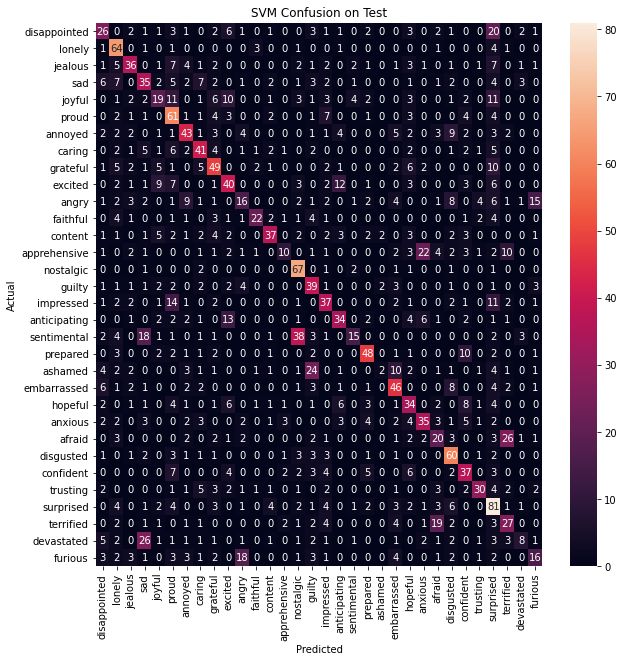

In [71]:
# evalute it
#clf.evaluate_svm(valid_prompt, valid_prompt_labels)
clf.evaluate_svm(test_prompt, test_prompt_labels)

#SVM from utterances to 32 emotion labels

In [72]:
# extract utterances, emotion label
train_utter, train_utter_labels = extract_instances(train, 'clean_utterance', 'context')
#valid_utter, valid_utter_labels = extract_instances(valid, 'clean_utterance', 'context')
test_utter, test_utter_labels = extract_instances(test, 'clean_utterance', 'context')

In [73]:
# train svm 
clf = SVM_Classifier(train_utter, train_utter_labels)

              precision    recall  f1-score   support

      afraid       0.21      0.23      0.22       164
       angry       0.20      0.19      0.19       181
     annoyed       0.23      0.25      0.24       198
anticipating       0.27      0.23      0.25       166
     anxious       0.28      0.29      0.29       170
apprehensive       0.36      0.06      0.11       158
     ashamed       0.14      0.03      0.05       143
      caring       0.28      0.22      0.25       177
   confident       0.21      0.20      0.21       170
     content       0.35      0.33      0.34       172
  devastated       0.15      0.06      0.09       147
disappointed       0.31      0.16      0.21       188
   disgusted       0.36      0.48      0.41       189
 embarrassed       0.40      0.42      0.41       179
     excited       0.23      0.30      0.26       202
    faithful       0.45      0.19      0.27       117
     furious       0.19      0.13      0.15       153
    grateful       0.27    

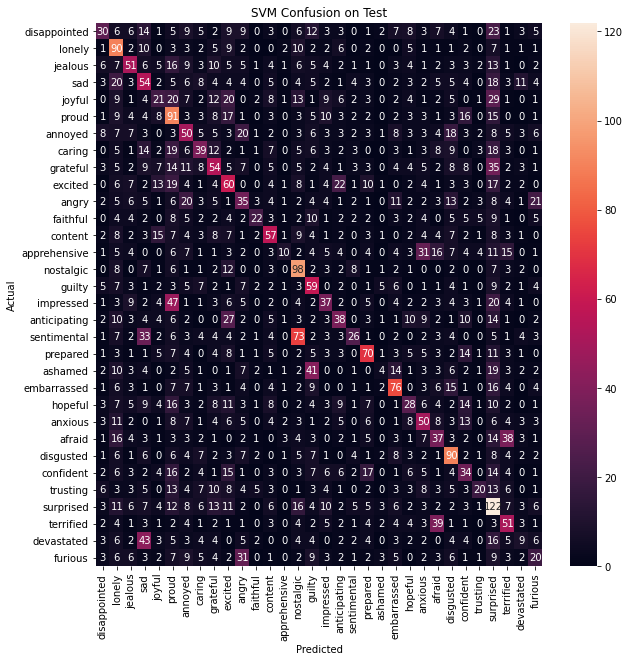

In [74]:
# evalute it
#clf.evaluate_svm(valid_utter, valid_utter_labels)
clf.evaluate_svm(test_utter, test_utter_labels)

#SVM from prompts to sentiment

In [75]:
# extract prompt, sentiment from data
train_prompt, train_sent = extract_instances(train, 'clean_prompt', 'emotion_category')
#valid_prompt, valid_sent = extract_instances(valid, 'clean_prompt', 'emotion_category')
test_prompt, test_sent = extract_instances(test, 'clean_prompt', 'emotion_category')

In [76]:
# train svm 
clf = SVM_Classifier(train_prompt, train_sent)

              precision    recall  f1-score   support

           0       0.70      0.28      0.40       420
           1       0.73      0.67      0.70       895
           2       0.73      0.92      0.82      1223

    accuracy                           0.73      2538
   macro avg       0.72      0.63      0.64      2538
weighted avg       0.73      0.73      0.71      2538



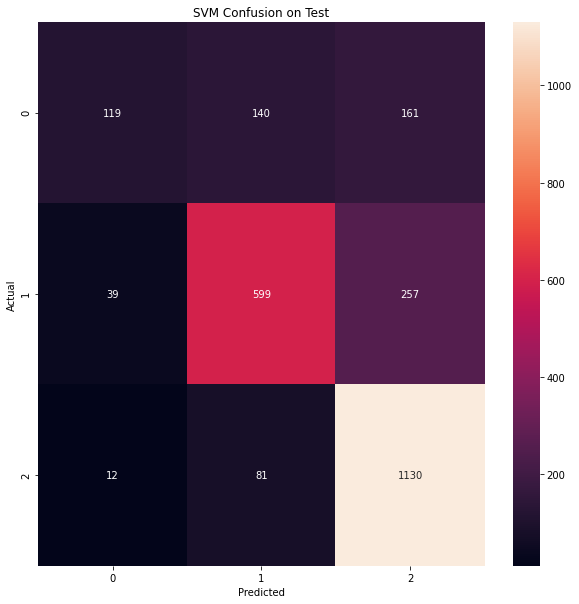

In [77]:
# evalute it
#clf.evaluate_svm(valid_prompt, valid_sent)
clf.evaluate_svm(test_prompt, test_sent)

#SVM from utterances to sentiment

In [78]:
# extract utterances, sentiment from data
train_utter, train_sent = extract_instances(train, 'clean_utterance', 'emotion_category')
#valid_utter, valid_sent = extract_instances(valid, 'clean_utter', 'emotion_category')
test_utter, test_sent = extract_instances(test, 'clean_utterance', 'emotion_category')

In [79]:
# train svm 
clf = SVM_Classifier(train_utter, train_sent)

              precision    recall  f1-score   support

           0       0.59      0.13      0.21       949
           1       0.63      0.56      0.59      2022
           2       0.64      0.87      0.74      2710

    accuracy                           0.64      5681
   macro avg       0.62      0.52      0.51      5681
weighted avg       0.63      0.64      0.60      5681



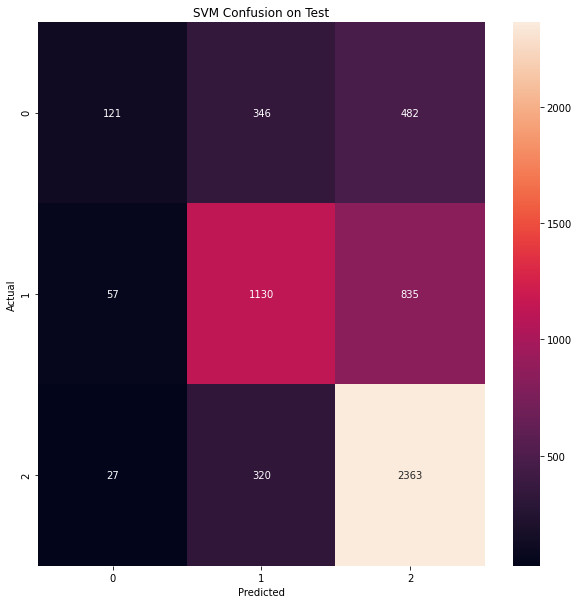

In [80]:
# evalute it
#clf.evaluate_svm(valid_utter, valid_sent)
clf.evaluate_svm(test_utter, test_sent)

#SVM from speaker utterances to emotion

In [81]:
# extract spekaer data
train_speaker = train[train["speaker_label"] == "speaker"]
valid_speaker = valid[valid["speaker_label"] == "speaker"]
test_speaker  = test[test["speaker_label"] == "speaker"]

# extract text, labels
train_utter, train_utter_labels = extract_instances(train_speaker, 'clean_utterance', 'context')
#valid_utter, valid_utter_labels = extract_instances(valid_speaker, 'clean_utterance', 'context')
test_utter, test_utter_labels = extract_instances(test_speaker, 'clean_utterance', 'context')

In [82]:
# train svm 
clf = SVM_Classifier(train_utter, train_utter_labels)

              precision    recall  f1-score   support

      afraid       0.27      0.30      0.28        88
       angry       0.25      0.23      0.24        96
     annoyed       0.30      0.31      0.31       106
anticipating       0.32      0.24      0.28        90
     anxious       0.36      0.35      0.36        93
apprehensive       0.29      0.05      0.08        86
     ashamed       0.25      0.04      0.07        77
      caring       0.37      0.34      0.35        95
   confident       0.21      0.23      0.22        94
     content       0.41      0.40      0.40        92
  devastated       0.22      0.14      0.17        78
disappointed       0.36      0.15      0.21       105
   disgusted       0.39      0.43      0.41       103
 embarrassed       0.45      0.46      0.45        98
     excited       0.28      0.35      0.31       110
    faithful       0.61      0.30      0.40        66
     furious       0.22      0.16      0.18        82
    grateful       0.34    

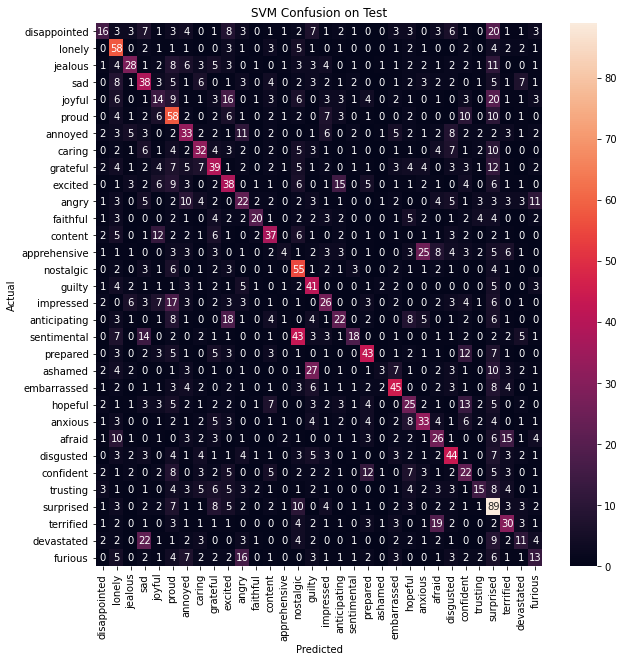

In [83]:
# evalute it
#clf.evaluate_svm(valid_utter, valid_utter_labels)
clf.evaluate_svm(test_utter, test_utter_labels)

#SVM from listerner utterances to emotion

In [84]:
# extract listener data
train_listener = train[train["speaker_label"] == "listener"]
valid_listener = valid[valid["speaker_label"] == "listener"]
test_listener  = test[test["speaker_label"] == "listener"]

# extract text, labels
train_utter, train_utter_labels = extract_instances(train_listener, 'clean_utterance', 'context')
#valid_utter, valid_utter_labels = extract_instances(valid_listener, 'clean_utterance', 'context')
test_utter, test_utter_labels = extract_instances(test_listener, 'clean_utterance', 'context')

In [85]:
# train svm 
clf = SVM_Classifier(train_utter, train_utter_labels)

              precision    recall  f1-score   support

      afraid       0.07      0.07      0.07        76
       angry       0.09      0.11      0.10        85
     annoyed       0.10      0.13      0.11        92
anticipating       0.10      0.09      0.10        76
     anxious       0.16      0.14      0.15        78
apprehensive       0.18      0.04      0.07        72
     ashamed       0.10      0.03      0.05        66
      caring       0.14      0.09      0.11        82
   confident       0.14      0.12      0.13        76
     content       0.33      0.23      0.27        80
  devastated       0.04      0.01      0.02        69
disappointed       0.12      0.06      0.08        83
   disgusted       0.30      0.40      0.34        87
 embarrassed       0.27      0.25      0.26        81
     excited       0.14      0.21      0.16        92
    faithful       0.14      0.02      0.03        51
     furious       0.08      0.08      0.08        71
    grateful       0.18    

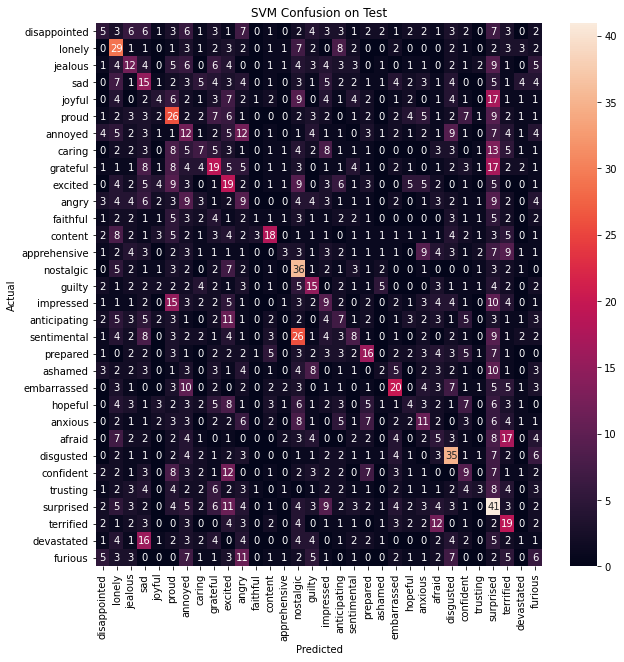

In [86]:
# evalute it
#clf.evaluate_svm(valid_utter, valid_utter_labels)
clf.evaluate_svm(test_utter, test_utter_labels)

#SVM from listener utterances to sentiment

In [87]:
# extract listener data
train_listener = train[train["speaker_label"] == "listener"]
valid_listener = valid[valid["speaker_label"] == "listener"]
test_listener  = test[test["speaker_label"] == "listener"]

# extract text, labels
train_utter, train_sent = extract_instances(train_listener, 'clean_utterance', 'emotion_category')
#valid_utter, valid_sent = extract_instances(valid_listener, 'clean_utterance', 'emotion_category')
test_utter, test_sent = extract_instances(test_listener, 'clean_utterance', 'emotion_category')

In [88]:
# train svm 
clf = SVM_Classifier(train_utter, train_sent)

              precision    recall  f1-score   support

           0       0.23      0.02      0.03       434
           1       0.55      0.40      0.46       922
           2       0.57      0.87      0.69      1249

    accuracy                           0.56      2605
   macro avg       0.45      0.43      0.39      2605
weighted avg       0.50      0.56      0.50      2605



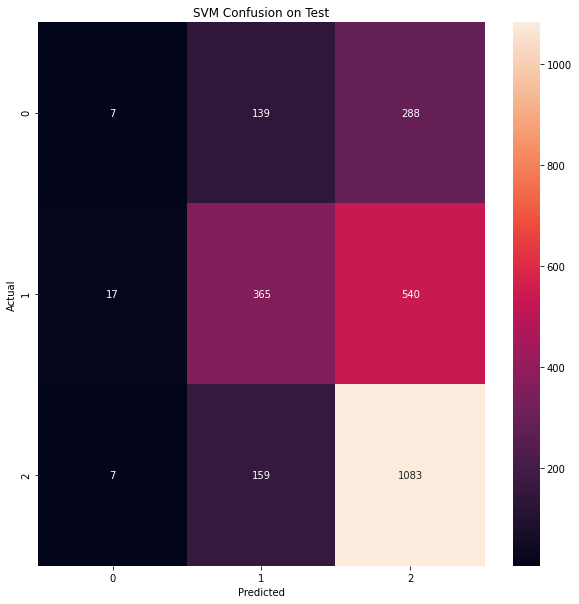

In [89]:
# evalute it
#clf.evaluate_svm(valid_utter, valid_sent)
clf.evaluate_svm(test_utter, test_sent)

#SVM from speaker utterances to sentiment

In [90]:
# extract listener data
train_listener = train[train["speaker_label"] == "listener"]
valid_listener = valid[valid["speaker_label"] == "listener"]
test_listener  = test[test["speaker_label"] == "listener"]

# extract text, labels
train_utter, train_sent = extract_instances(train_listener, 'clean_utterance', 'emotion_category')
#valid_utter, valid_sent = extract_instances(valid_listener, 'clean_utterance', 'emotion_category')
test_utter, test_sent = extract_instances(test_listener, 'clean_utterance', 'emotion_category')

In [91]:
# train svm 
clf = SVM_Classifier(train_utter, train_sent)

              precision    recall  f1-score   support

           0       0.23      0.02      0.03       434
           1       0.55      0.40      0.46       922
           2       0.57      0.87      0.69      1249

    accuracy                           0.56      2605
   macro avg       0.45      0.43      0.39      2605
weighted avg       0.50      0.56      0.50      2605



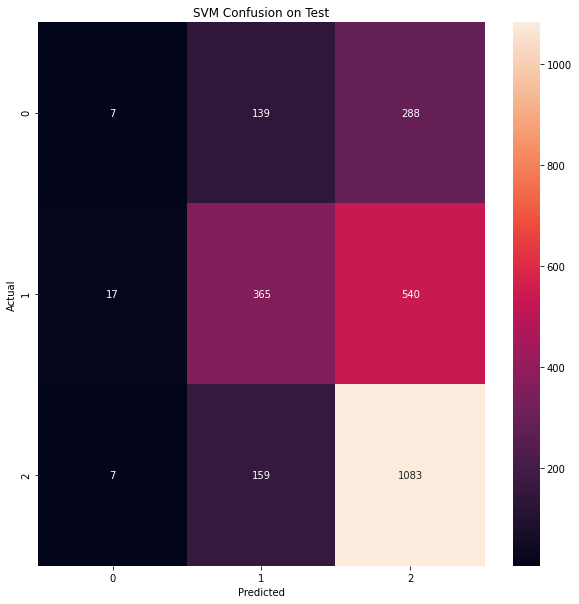

In [92]:
# evalute it
#clf.evaluate_svm(valid_utter, valid_sent)
clf.evaluate_svm(test_utter, test_sent)

#SVM from LIWC to emotions

In [93]:
non_liwc = 'conv_id utterance_idx	prompt	speaker_idx	utterance	selfeval	tags	clean_prompt	clean_utterance	speaker_label'.split()

In [94]:
train_liwc = train.drop(columns=non_liwc).dropna()
valid_liwc = valid.drop(columns=non_liwc).dropna()
test_liwc  = test.drop(columns=non_liwc).dropna()

In [95]:
train_labels = train_liwc.context; train_liwc_feat = train_liwc.drop(columns=['context'])#.values.tolist()
#valid_labels = valid_liwc.context; valid_liwc_feat = valid_liwc.drop(columns=['context'])
test_labels = test_liwc.context; test_liwc_feat = test_liwc.drop(columns=['context'])

,context,emotion_category,Total Function Words,Total Pronouns,Personal Pronouns,First Person Singular,First Person Plural,Second Person,Third Person Singular,Third Person Plural,Impersonal Pronouns,Articles,Common Verbs,Auxiliary Verbs,Past Tense,Present Tense,Future Tense,Adverbs,Prepositions,Conjunctions,Negations,Quantifiers,Number,Swear Words,Social Processes,Family,Friends,Humans,Affective Processes,Positive Emotion,Negative Emotion,Anxiety,Anger,Sadness,Cognitive Processes,Insight,Causation,Discrepancy,Tentative,Certainty,...,Perceptual Processes,See,Hear,Feel,Biological Processes,Body,Health,Sexual,Ingestion,Relativity,Motion,Space,Time,Work,Achievement,Leisure,Home,Money,Religion,Death,Assent,Nonfluencies,Fillers,Total first person,Total third person,Positive feelings,Optimism and energy,Communication,Other references to people,Up,Down,Occupation,School,Sports,TV,Music,Metaphysical issues,Physical states and functions,Sleeping,Grooming
0,sentimental,1,68.000000,16.000000,12.000000,8.000000,4.0,0.0,0.0,0.0,4.000000,12.000000,8.000000,4.000000,8.000000,0.000000,0.0,8.000000,16.000000,4.000000,0.000000,8.000000,0.000000,0.0,12.0,0.0,4.0,4.0,8.0,8.0,0.0,0.0,0.0,0.0,20.000000,8.000000,0.000000,0.000000,4.000000,0.000000,...,4.0,0.0,0.0,4.0,0.000000,0.000000,0.000000,0.0,0.0,12.000000,4.000000,8.0,4.000000,0.0,4.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,sentimental,1,68.000000,16.000000,12.000000,8.000000,4.0,0.0,0.0,0.0,4.000000,12.000000,8.000000,4.000000,8.000000,0.000000,0.0,8.000000,16.000000,4.000000,0.000000,8.000000,0.000000,0.0,12.0,0.0,4.0,4.0,8.0,8.0,0.0,0.0,0.0,0.0,20.000000,8.000000,0.000000,0.000000,4.000000,0.000000,...,4.0,0.0,0.0,4.0,0.000000,0.000000,0.000000,0.0,0.0,12.000000,4.000000,8.0,4.000000,0.0,4.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,sentimental,1,68.000000,16.000000,12.000000,8.000000,4.0,0.0,0.0,0.0,4.000000,12.000000,8.000000,4.000000,8.000000,0.000000,0.0,8.000000,16.000000,4.000000,0.000000,8.000000,0.000000,0.0,12.0,0.0,4.0,4.0,8.0,8.0,0.0,0.0,0.0,0.0,20.000000,8.000000,0.000000,0.000000,4.000000,0.000000,...,4.0,0.0,0.0,4.0,0.000000,0.000000,0.000000,0.0,0.0,12.000000,4.000000,8.0,4.000000,0.0,4.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,sentimental,1,68.000000,16.000000,12.000000,8.000000,4.0,0.0,0.0,0.0,4.000000,12.000000,8.000000,4.000000,8.000000,0.000000,0.0,8.000000,16.000000,4.000000,0.000000,8.000000,0.000000,0.0,12.0,0.0,4.0,4.0,8.0,8.0,0.0,0.0,0.0,0.0,20.000000,8.000000,0.000000,0.000000,4.000000,0.000000,...,4.0,0.0,0.0,4.0,0.000000,0.000000,0.000000,0.0,0.0,12.000000,4.000000,8.0,4.000000,0.0,4.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,sentimental,1,68.000000,16.000000,12.000000,8.000000,4.0,0.0,0.0,0.0,4.000000,12.000000,8.000000,4.000000,8.000000,0.000000,0.0,8.000000,16.000000,4.000000,0.000000,8.000000,0.000000,0.0,12.0,0.0,4.0,4.0,8.0,8.0,0.0,0.0,0.0,0.0,20.000000,8.000000,0.000000,0.000000,4.000000,0.000000,...,4.0,0.0,0.0,4.0,0.000000,0.000000,0.000000,0.0,0.0,12.000000,4.000000,8.0,4.000000,0.0,4.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63841,anxious,2,72.727273,13.636364,13.636364,13.636364,0.0,0.0,0.0,0.0,0.000000,4.545455,27.272727,13.636364,0.000000,27.272727,0.0,18.181818,18.181818,0.000000,4.545455,0.000000,4.545455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.090909,0.000000,0.000000,4.54

In [96]:
 # train svm 
clf = SVM_Classifier(train_liwc_feat, train_labels, liwc=True)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      afraid       0.50      0.02      0.05       164
       angry       0.18      0.08      0.11       181
     annoyed       0.13      0.52      0.20       198
anticipating       0.73      0.24      0.36       166
     anxious       0.46      0.08      0.13       171
apprehensive       0.00      0.00      0.00       158
     ashamed       0.11      0.02      0.04       143
      caring       0.50      0.25      0.34       177
   confident       0.53      0.25      0.34       170
     content       0.19      0.47      0.27       172
  devastated       0.13      0.53      0.21       148
disappointed       0.21      0.14      0.17       188
   disgusted       0.27      0.28      0.28       190
 embarrassed       0.28      0.11      0.15       179
     excited       0.37      0.32      0.34       202
    faithful       0.71      0.04      0.08       117
     furious       0.00      0.00      0.00       153
    grateful       0.14    

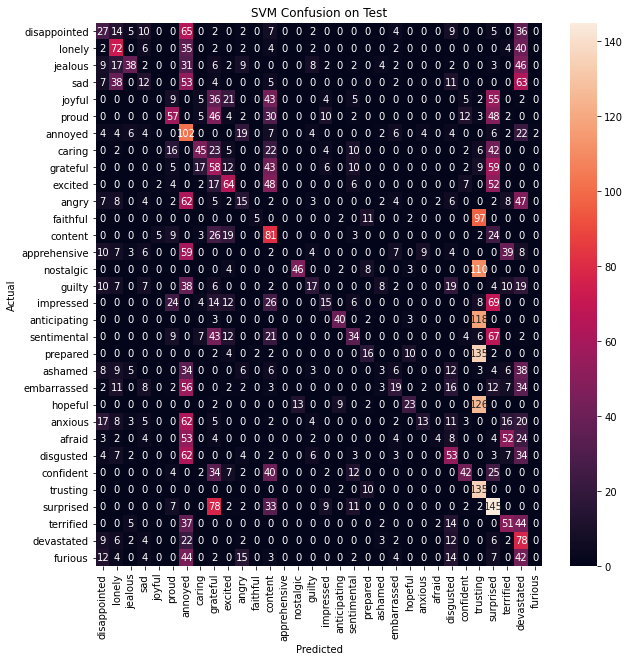

In [97]:
# evalute it
#clf.evaluate_svm(test_liwc_feat, valid_labels)
clf.evaluate_svm(test_liwc_feat, test_labels)

#SVM from LIWC features to sentiment

In [105]:
non_liwc = 'conv_id utterance_idx	prompt	speaker_idx	utterance	selfeval	tags	clean_prompt	clean_utterance	speaker_label'.split()

In [106]:
train_liwc = train.drop(columns=non_liwc).dropna()
valid_liwc = valid.drop(columns=non_liwc).dropna()
test_liwc  = test.drop(columns=non_liwc).dropna()

In [113]:
train_labels = train_liwc['emotion_category']; train_liwc_feat = train_liwc.drop(columns=['context', 'emotion_category'])
#valid_labels = valid_liwc['emotion_category']; valid_liwc_feat = valid_liwc.drop(columns=['context', 'emotion_category'])
test_labels = test_liwc['emotion_category']; test_liwc_feat = test_liwc.drop(columns=['context', 'emotion_category'])

In [114]:
 # train svm 
clf = SVM_Classifier(train_liwc_feat, train_labels, liwc=True)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


              precision    recall  f1-score   support

           0       0.50      0.06      0.10       951
           1       0.53      0.74      0.62      2024
           2       0.71      0.72      0.72      2726

    accuracy                           0.62      5701
   macro avg       0.58      0.51      0.48      5701
weighted avg       0.61      0.62      0.58      5701



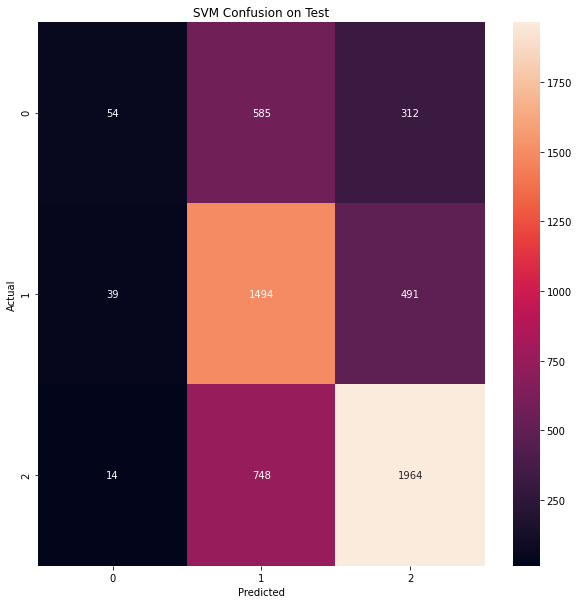

In [115]:
# evalute it
#clf.evaluate_svm(test_liwc_feat, valid_labels)
clf.evaluate_svm(test_liwc_feat, test_labels)